In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def kernel(x1,x2,l):
    return np.exp(-1.0/l**2*(x1-x2).dot(x1-x2))

def kernelMat(X1,X2,l):
    q, N1 = X1.shape
    q, N2 = X2.shape

    K = np.zeros((N1,N2))
    for i in range(N1):
        for j in range(N2): 
            K[i,j] = kernel(X1[:,i],X2[:,j],l)

    return K

def evalGP(X,Y,x_eval):
    K_XX = kernelMat(np.mat(X),np.mat(X),1)
    K_xX = kernelMat(np.mat(x_eval),np.mat(X),1)
    K_Xx = K_xX.T
    K_xx = kernelMat(np.mat(x_eval),np.mat(x_eval),1)
    
    mu = K_xX @ np.linalg.inv(K_XX) @ Y
    sig = K_xx - K_xX @ np.linalg.inv(K_XX) @ K_Xx
    
    return (mu,sig)

In [3]:
n_samples = 11
n_grid = 200

X = np.linspace(0,10,n_samples)
Y = np.random.uniform(size=n_samples)

x = np.linspace(0,10,n_grid)

In [4]:
mu, sig = evalGP(X,Y,x)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: covariance is not positive-semidefinite.


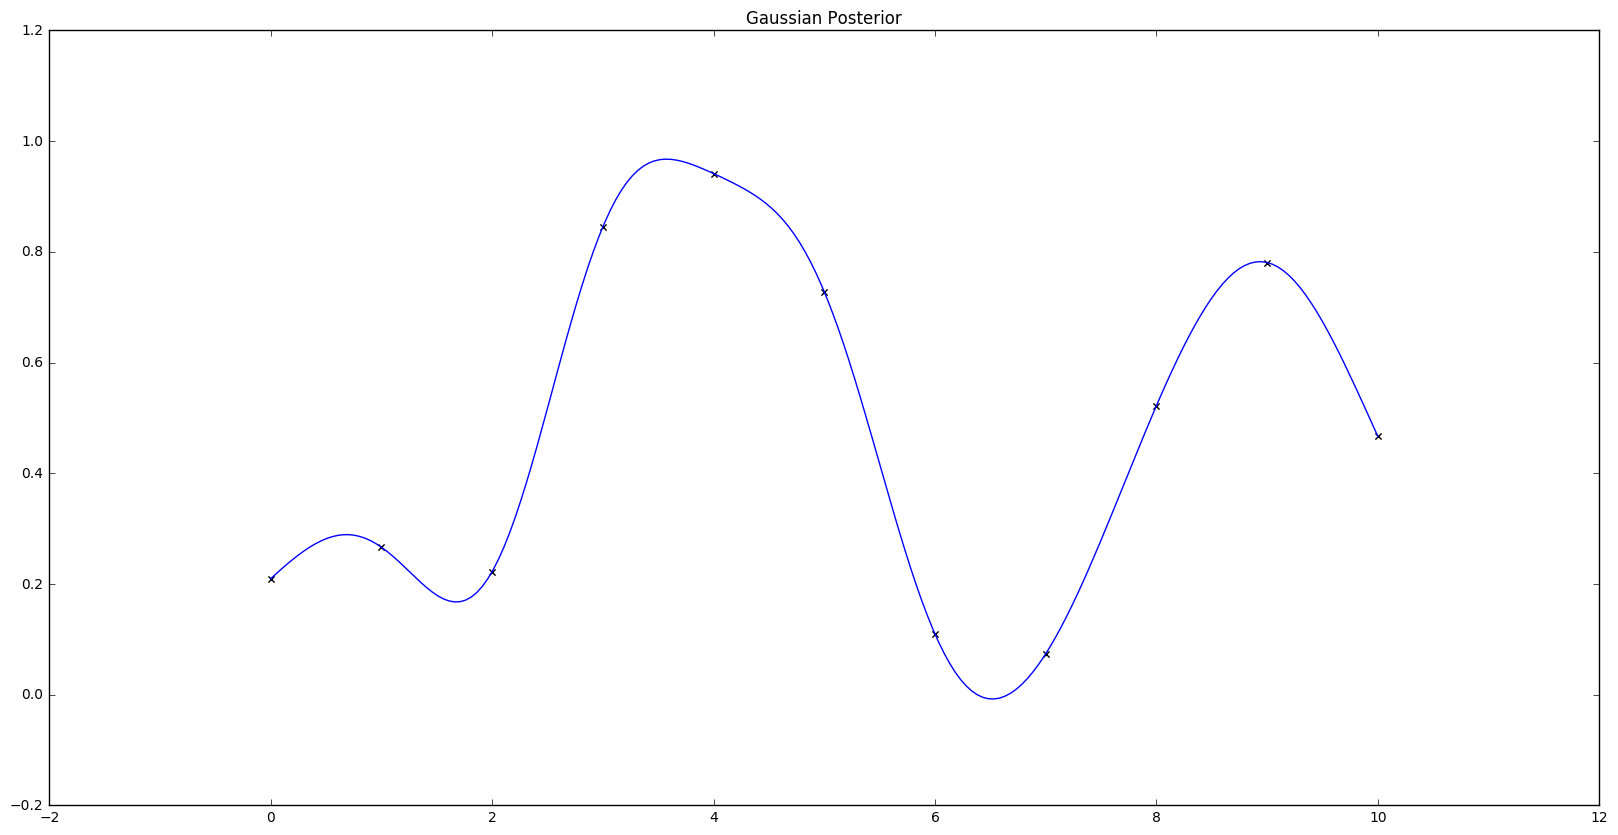

In [6]:
plt.figure(figsize=(20,10))
plt.hold = True
plt.scatter(X,Y,color='k',marker='x')
for i in range(1):
    y_pred = np.random.multivariate_normal(mu,sig)
    #plt.plot(x,y_pred)
    plt.plot(x,mu,'b')

plt.title('Gaussian Posterior')
plt.show()

In [34]:
with open('gp_data.csv','ab') as f:
    for i in range(10):
        Y = np.random.uniform(size=n_samples)
        mu, sig = evalGP(X,Y,x)
        for _ in range(4):
            y_pred = np.random.multivariate_normal(mu,sig)
            np.savetxt(f,y_pred)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: covariance is not positive-semidefinite.
